In [186]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv


In [187]:
items= pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/items.csv')
sample_submission=pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv')
item_categories=pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv')
sales_train=pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv',parse_dates=True)
shops=pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/shops.csv')
test=pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/test.csv')

In [188]:
sales_train['date'] = pd.to_datetime(sales_train['date'])

In [189]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-02-01,0,59,22154,999.00,1.0
1,2013-03-01,0,25,2552,899.00,1.0
2,2013-05-01,0,25,2552,899.00,-1.0
3,2013-06-01,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-09-10,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


In [190]:
sample_submission

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5


In [191]:
items = items[['item_id','item_category_id']]

In [192]:
#sales_train['date'] = pd.to_datetime(sales_train['date'])
#sales_train['month'] = sales_train['date'].apply(lambda x:x.month)
#sales_train['year'] = sales_train['date'].apply(lambda x:x.year)

In [193]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-02-01,0,59,22154,999.00,1.0
1,2013-03-01,0,25,2552,899.00,1.0
2,2013-05-01,0,25,2552,899.00,-1.0
3,2013-06-01,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-09-10,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


In [194]:
sales_train.groupby('item_id').count()['item_price']

item_id
0           1
1           6
2           2
3           2
4           1
         ... 
22165       2
22166     270
22167    1114
22168       6
22169       1
Name: item_price, Length: 21807, dtype: int64

In [195]:
sales_train[['item_id','item_price']]

,item_id,item_price
0,22154,999.00
1,2552,899.00
2,2552,899.00
3,2554,1709.05
4,2555,1099.00
...,...,...
2935844,7409,299.00
2935845,7460,299.00
2935846,7459,349.00
2935847,7440,299.00


In [196]:
sales_train_pivot = sales_train.pivot_table(index=['shop_id','item_id','item_price'],
                                 values='item_cnt_day',
                                 columns=['date_block_num'],
                                 aggfunc=np.sum)
sales_train_pivot

date_block_num               0     1   2   3   4   5   6   7   8    9   ...  \
shop_id item_id item_price                                              ...   
0       30      265.0       NaN  31.0 NaN NaN NaN NaN NaN NaN NaN  NaN  ...   
        31      434.0       NaN  11.0 NaN NaN NaN NaN NaN NaN NaN  NaN  ...   
        32      221.0       6.0  10.0 NaN NaN NaN NaN NaN NaN NaN  NaN  ...   
        33      347.0       3.0   3.0 NaN NaN NaN NaN NaN NaN NaN  NaN  ...   
        35      247.0       1.0  14.0 NaN NaN NaN NaN NaN NaN NaN  NaN  ...   
...                         ...   ...  ..  ..  ..  ..  ..  ..  ..  ...  ...   
59      22162   349.0       NaN   NaN NaN NaN NaN NaN NaN NaN NaN  NaN  ...   
                399.0       NaN   NaN NaN NaN NaN NaN NaN NaN NaN  NaN  ...   
        22164   699.0       NaN   NaN NaN NaN NaN NaN NaN NaN NaN  NaN  ...   
                749.0       NaN   NaN NaN NaN NaN NaN NaN NaN NaN  NaN  ...   
        22167   299.0       NaN   NaN NaN NaN NaN NaN NaN NaN NaN  1.0  ...   

date_block_num              24   25   26   27   28  29   30   31  32  33  
shop_id item_id item_price                                                
0       30      265.0      NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN NaN  
        31      434.0      NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN NaN  
        32      221.0      NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN NaN  
        33      347.0      NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN NaN  
        35      247.0      NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN NaN  
...                         ..  ...  ...  ...  ...  ..  ...  ...  ..  ..  
59      22162   349.0      NaN  NaN  NaN  1.0  1.0 NaN  NaN  1.0 NaN NaN  
                399.0      NaN  9.0  4.0  NaN  NaN NaN  NaN  NaN NaN NaN  
        22164   699.0      NaN  NaN  NaN  2.0  NaN NaN  1.0  NaN NaN NaN  
                749.0      NaN  2.0  1.0  NaN  NaN NaN  NaN  NaN NaN NaN  
        22167   299.0      NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN NaN  

[737820 rows x 34 columns]

In [197]:
test = pd.merge(left=test,
                 right=items,
                 on='item_id',
                 how='left')

In [198]:
test

,ID,shop_id,item_id,item_category_id
0,0,5,5037,19
1,1,5,5320,55
2,2,5,5233,19
3,3,5,5232,23
4,4,5,5268,20
...,...,...,...,...
214195,214195,45,18454,55
214196,214196,45,16188,64
214197,214197,45,15757,55
214198,214198,45,19648,40


In [199]:
test = test.drop('ID',axis=1)

In [200]:
#sales_train['date'] = pd.to_datetime(sales_train['date'])
#sales_train['month'] = sales_train['date'].apply(lambda x:x.month)
#sales_train['year'] = sales_train['date'].apply(lambda x:x.year)

In [201]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [202]:
sales_train2 = sales_train.copy()

In [203]:
pivot = sales_train2.pivot_table(index=['shop_id','item_id'],
                                 values='item_cnt_day',
                                 fill_value=0,
                                 columns=['date_block_num'],
                                 aggfunc=np.sum)
pivot

date_block_num   0   1   2   3   4   5   6   7   8   9   ...  24  25  26  27  \
shop_id item_id                                          ...                   
0       30        0  31   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        31        0  11   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        32        6  10   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        33        3   3   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        35        1  14   0   0   0   0   0   0   0   0  ...   0   0   0   0   
...              ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..   
59      22154     1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        22155     0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   
        22162     0   0   0   0   0   0   0   0   0   0  ...   0   9   4   1   
        22164     0   0   0   0   0   0   0   0   0   0  ...   0   2   1   2   
        22167     0   0   0   0   0   0   0   0   0   1  ...   0   0   0   0   

date_block_num   28  29  30  31  32  33  
shop_id item_id                          
0       30        0   0   0   0   0   0  
        31        0   0   0   0   0   0  
        32        0   0   0   0   0   0  
        33        0   0   0   0   0   0  
        35        0   0   0   0   0   0  
...              ..  ..  ..  ..  ..  ..  
59      22154     0   0   0   0   0   0  
        22155     0   0   0   0   0   0  
        22162     1   0   0   1   0   0  
        22164     0   0   1   0   0   0  
        22167     0   0   0   0   0   0  

[424124 rows x 34 columns]

In [204]:
pivot = pd.merge(left=test,
                 right=pivot,
                 on=['shop_id','item_id'],
                 how='left')

In [205]:
pivot

,shop_id,item_id,item_category_id,0,1,2,3,4,5,6,...,24,25,26,27,28,29,30,31,32,33
0,5,5037,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,5,5320,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,5233,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,5,5232,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,5268,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,45,18454,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
214196,45,16188,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214197,45,15757,55,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214198,45,19648,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
pivot.fillna(0,inplace=True)

In [207]:
pivot

,shop_id,item_id,item_category_id,0,1,2,3,4,5,6,...,24,25,26,27,28,29,30,31,32,33
0,5,5037,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,5,5320,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,5233,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,5,5232,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,5268,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,45,18454,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
214196,45,16188,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214197,45,15757,55,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214198,45,19648,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [208]:
pivot = pivot.drop(['shop_id','item_id','item_category_id'],axis=1)

In [209]:
from sklearn.preprocessing import StandardScaler

In [210]:
pivot_backup = pivot.copy()

In [211]:
pivot_scaled = scaler.fit_transform(pivot)

In [212]:
pivot = pd.DataFrame(pivot_scaled, columns=pivot.columns)

In [213]:
pivot

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-0.093300,-0.091559,-0.081262,-0.10144,-0.05372,-0.038269,-0.043844,-0.045824,-0.043676,-0.048454,...,0.412953,-0.135627,-0.148566,-0.0668,0.192431,0.331622,0.352671,1.266194,0.290271,-0.052858
1,-0.093300,-0.091559,-0.081262,-0.10144,-0.05372,-0.038269,-0.043844,-0.045824,-0.043676,-0.048454,...,-0.077339,-0.135627,-0.148566,-0.0668,-0.068738,-0.105781,-0.113941,-0.129388,-0.109894,-0.052858
2,-0.093300,-0.091559,-0.081262,-0.10144,-0.05372,-0.038269,-0.043844,-0.045824,-0.043676,-0.048454,...,-0.077339,-0.135627,-0.148566,-0.0668,0.714768,0.769026,-0.113941,0.335806,1.090600,0.127291
3,-0.093300,-0.091559,-0.081262,-0.10144,-0.05372,-0.038269,-0.043844,-0.045824,-0.043676,-0.048454,...,-0.077339,-0.135627,-0.148566,-0.0668,-0.068738,-0.105781,-0.113941,0.335806,-0.109894,-0.052858
4,-0.093300,-0.091559,-0.081262,-0.10144,-0.05372,-0.038269,-0.043844,-0.045824,-0.043676,-0.048454,...,-0.077339,-0.135627,-0.148566,-0.0668,-0.068738,-0.105781,-0.113941,-0.129388,-0.109894,-0.052858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,-0.093300,-0.091559,-0.081262,-0.10144,-0.05372,-0.038269,-0.043844,-0.045824,-0.043676,-0.048454,...,0.412953,0.396476,0.431580,-0.0668,-0.068738,-0.105781,-0.113941,-0.129388,-0.109894,0.127291
214196,-0.093300,-0.091559,-0.081262,-0.10144,-0.05372,-0.038269,-0.043844,-0.045824,-0.043676,-0.048454,...,-0.077339,-0.135627,-0.148566,-0.0668,-0.068738,-0.105781,-0.113941,-0.129388,-0.109894,-0.052858
214197,0.876274,-0.091559,-0.081262,-0.10144,-0.05372,-0.038269,-0.043844,-0.045824,-0.043676,-0.048454,...,0.167807,0.396476,-0.148566,-0.0668,-0.068738,-0.105781,-0.113941,-0.129388,-0.109894,-0.052858
214198,-0.093300,-0.091559,-0.081262,-0.10144,-0.05372,-0.038269,-0.043844,-0.045824,-0.043676,-0.048454,...,-0.077339,-0.135627,-0.148566,-0.0668,-0.068738,-0.105781,-0.113941,-0.129388,-0.109894,-0.052858


In [214]:
X_train = np.expand_dims(pivot.values[:,:-2],axis=2)
y_train = pivot.values[:,-2:-1]
X_test = np.expand_dims(pivot.values[:,2:],axis=2)
y_test = pivot.values[:,-1:]
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(214200, 32, 1) (214200, 1) (214200, 32, 1) (214200, 1)


In [215]:
from keras.models import Sequential
model = Sequential()

In [216]:
from keras.layers import Dense,LSTM
from sklearn.metrics import mean_squared_error

In [217]:
model.add(LSTM(units=64,input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [228]:
model.fit(X_train,y_train,batch_size=4096,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
53/53 [==============================] - 26s 502ms/step - loss: 0.5954 - val_loss: 0.7489
Epoch 2/10
53/53 [==============================] - 26s 500ms/step - loss: 0.5923 - val_loss: 0.7496
Epoch 3/10
53/53 [==============================] - 26s 493ms/step - loss: 0.5867 - val_loss: 0.7436
Epoch 4/10
53/53 [==============================] - 26s 491ms/step - loss: 0.5826 - val_loss: 0.7422
Epoch 5/10
53/53 [==============================] - 26s 495ms/step - loss: 0.5799 - val_loss: 0.7392
Epoch 6/10
53/53 [==============================] - 26s 495ms/step - loss: 0.5742 - val_loss: 0.7348
Epoch 7/10
53/53 [==============================] - 26s 493ms/step - loss: 0.5693 - val_loss: 0.7357
Epoch 8/10
53/53 [==============================] - 25s 483ms/step - loss: 0.5664 - val_loss: 0.7253
Epoch 9/10
53/53 [==============================] - 26s 491ms/step - loss: 0.5608 - val_loss: 0.7211
Epoch 10/10
53/53 [==============================] - 26s 496ms/step - loss: 0.5582 - val_lo

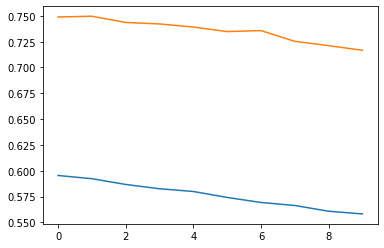

In [229]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])

In [230]:
pred = model.predict(X_test)

In [243]:
pivot['34'] = pred

In [244]:
pivot.iloc[:,1:]

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
0,-0.091559,-0.081262,-0.10144,-0.05372,-0.038269,-0.043844,-0.045824,-0.043676,-0.048454,-0.050574,...,-0.135627,-0.148566,-0.0668,0.192431,0.331622,0.352671,1.266194,0.290271,-0.052858,0.156810
1,-0.091559,-0.081262,-0.10144,-0.05372,-0.038269,-0.043844,-0.045824,-0.043676,-0.048454,-0.050574,...,-0.135627,-0.148566,-0.0668,-0.068738,-0.105781,-0.113941,-0.129388,-0.109894,-0.052858,-0.018819
2,-0.091559,-0.081262,-0.10144,-0.05372,-0.038269,-0.043844,-0.045824,-0.043676,-0.048454,-0.050574,...,-0.135627,-0.148566,-0.0668,0.714768,0.769026,-0.113941,0.335806,1.090600,0.127291,0.214162
3,-0.091559,-0.081262,-0.10144,-0.05372,-0.038269,-0.043844,-0.045824,-0.043676,-0.048454,-0.050574,...,-0.135627,-0.148566,-0.0668,-0.068738,-0.105781,-0.113941,0.335806,-0.109894,-0.052858,-0.003063
4,-0.091559,-0.081262,-0.10144,-0.05372,-0.038269,-0.043844,-0.045824,-0.043676,-0.048454,-0.050574,...,-0.135627,-0.148566,-0.0668,-0.068738,-0.105781,-0.113941,-0.129388,-0.109894,-0.052858,-0.018819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,-0.091559,-0.081262,-0.10144,-0.05372,-0.038269,-0.043844,-0.045824,-0.043676,-0.048454,-0.050574,...,0.396476,0.431580,-0.0668,-0.068738,-0.105781,-0.113941,-0.129388,-0.109894,0.127291,0.028057
214196,-0.091559,-0.081262,-0.10144,-0.05372,-0.038269,-0.043844,-0.045824,-0.043676,-0.048454,-0.050574,...,-0.135627,-0.148566,-0.0668,-0.068738,-0.105781,-0.113941,-0.129388,-0.109894,-0.052858,-0.018819
214197,-0.091559,-0.081262,-0.10144,-0.05372,-0.038269,-0.043844,-0.045824,-0.043676,-0.048454,0.436882,...,0.396476,-0.148566,-0.0668,-0.068738,-0.105781,-0.113941,-0.129388,-0.109894,-0.052858,-0.017889
214198,-0.091559,-0.081262,-0.10144,-0.05372,-0.038269,-0.043844,-0.045824,-0.043676,-0.048454,-0.050574,...,-0.135627,-0.148566,-0.0668,-0.068738,-0.105781,-0.113941,-0.129388,-0.109894,-0.052858,-0.018819


In [241]:
scaler.inverse_transform(pivot.iloc[:,1:])

array([[ 1.79605487e-03,  1.16362870e-02, -3.66318522e-02, ...,
         9.02114644e-01,  1.42531203e-01,  1.16385840e+00],
       [ 1.79605487e-03,  1.16362870e-02, -3.66318522e-02, ...,
         4.19048515e-02,  1.42531203e-01,  1.88950268e-01],
       [ 1.79605487e-03,  1.16362870e-02, -3.66318522e-02, ...,
         2.62253423e+00,  5.92718419e-01,  1.48221740e+00],
       ...,
       [ 1.79605487e-03,  1.16362870e-02, -3.66318522e-02, ...,
         4.19048515e-02,  1.42531203e-01,  1.94109914e-01],
       [ 1.79605487e-03,  1.16362870e-02, -3.66318522e-02, ...,
         4.19048515e-02,  1.42531203e-01,  1.88950268e-01],
       [ 1.79605487e-03,  1.16362870e-02, -3.66318522e-02, ...,
         4.19048515e-02,  1.42531203e-01,  1.79609670e-01]])

In [245]:
pivot_returned = pd.DataFrame(scaler.inverse_transform(pivot.iloc[:,1:]),columns=pivot.iloc[:,1:].columns)

In [274]:
pivot_returned

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,...,-0.0,-0.0,0.0,1.0,2.0,1.0,3.0,1.0,0.0,1.0
1,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
2,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,...,-0.0,-0.0,0.0,3.0,3.0,-0.0,1.0,3.0,1.0,1.0
3,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,...,2.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,1.0,0.0
214196,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
214197,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,2.0,...,2.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
214198,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0


In [145]:
pred = pred.round()

In [73]:
sample_submission['item_cnt_month'] = pred.round()

In [87]:
from keras.layers import Conv1D,MaxPooling1D,Flatten

In [116]:
cnn = Sequential()
cnn.add(Conv1D(filters=64,kernel_size=2,activation='relu',input_shape=(X_train.shape[1], X_train.shape[2])))
cnn.add(MaxPooling1D(pool_size=3))
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(1))
cnn.compile(loss='mse',optimizer='adam',metrics=['mean_squared_error'])
cnn.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 32, 64)            192       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 10, 64)            0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                41024     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 41,281
Trainable params: 41,281
Non-trainable params: 0
_________________________________________________________________


In [117]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
6694/6694 [==============================] - 21s 3ms/step - loss: 25.0210 - mean_squared_error: 25.0210
Epoch 2/10
6694/6694 [==============================] - 22s 3ms/step - loss: 25.7796 - mean_squared_error: 25.7796
Epoch 3/10
6694/6694 [==============================] - 22s 3ms/step - loss: 36.2822 - mean_squared_error: 36.2822
Epoch 4/10
6694/6694 [==============================] - 21s 3ms/step - loss: 29.2957 - mean_squared_error: 29.2957
Epoch 5/10
6694/6694 [==============================] - 20s 3ms/step - loss: 31.7785 - mean_squared_error: 31.7785
Epoch 6/10
6694/6694 [==============================] - 21s 3ms/step - loss: 31.5937 - mean_squared_error: 31.5937
Epoch 7/10
6694/6694 [==============================] - 22s 3ms/step - loss: 23.3240 - mean_squared_error: 23.3240
Epoch 8/10
6694/6694 [==============================] - 21s 3ms/step - loss: 26.5646 - mean_squared_error: 26.5646
Epoch 9/10
6694/6694 [==============================] - 21s 3ms/step - loss: 29.

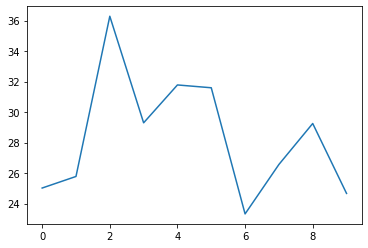

In [118]:
plt.plot(cnn.history.history['loss'])

In [136]:
cnn_pred = cnn.predict(X_test)

In [141]:
cnn_pred = cnn_pred.round()

In [143]:
cnn_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [148]:
from sklearn.metrics import accuracy_score

In [149]:
accuracy_score(pred,cnn_pred)

0.9172782446311858

In [123]:
cnn_pred.shape

(214200, 1)

In [150]:
sample_submission['item_cnt_month'] = pred

In [151]:
sample_submission.to_csv('submission.csv',index=False)

In [ ]:
train = pivot.dropna()

In [ ]:
train = train.drop('ID',axis=1)

In [ ]:
train.iloc[:,3:-1]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
rfc = RandomForestClassifier()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train[['shop_id','item_id','item_category_id']], train.iloc[:,3], test_size=0.33, random_state=42)

In [ ]:
rfc.fit(X_train,y_train)

In [ ]:
y_pred=rfc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
sns.scatterplot(y_test,y_pred)

In [ ]:
y_test